In [142]:
%load_ext autoreload
%autoreload 2
from fastai import *
from fastai.text import *
torch.cuda.set_device(0)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [143]:
data_path = Config.data_path(); data_path

PosixPath('/home/momgpu/.fastai/data')

In [144]:
bs = 64

In [145]:
lang = 'fr'
name = f'{lang}wiki'
path = data_path/name

In [146]:
mdl_path = path/'models'
mdl_path.mkdir(exist_ok=True)

In [147]:
df = pd.read_csv(path/"condensed_modified.csv", sep="	", header=None)

In [136]:
df.dropna()

,0,1
0,"Affaire Carlton: Souffrant, DSK pourrait ne pa...",objective
1,Le parquet de Lille indique que DSK n'a pas dé...,objective
2,DSK n'est pas tiré d'affaire: Une première aud...,objective
3,"Si DSK n'avait pas eu cette affaire là, j'aura...",objective
4,"Sarkozy : ""le PS voulait DSK"", pas Hollande le...",objective
5,Je n'ai pas beaucoup de leçons de style à rece...,objective
6,La leçon d'économie de DSK à Cambridge (attent...,objective
7,"Depardieu : ""Je vais jouer DSK car je ne l'aim...",objective
8,DSK n'est pas le bienvenu au Parlement europée...,objective
9,"Pour une fois que DSK et ses frasques ""passion...",mixed


In [137]:
for i in df.iterrows():
    sent = i[1][1]
    if sent == "positive":
        i[1][1] = 0
    elif sent == "negative":
        i[1][1] = 1
    elif sent == "mixed":
        i[1][1] = 2
    elif sent == "objective":
        i[1][1] = 3
print(df_TEMP)

                                                       0    1
0      Affaire Carlton: Souffrant, DSK pourrait ne pa...  3.0
1      Le parquet de Lille indique que DSK n'a pas dé...  3.0
2      DSK n'est pas tiré d'affaire: Une première aud...  3.0
3      Si DSK n'avait pas eu cette affaire là, j'aura...  3.0
4      Sarkozy : "le PS voulait DSK", pas Hollande le...  3.0
...                                                  ...  ...
11193  @jf_cope Bonne nouvelle pour l'#Ump, Ségolène ...  1.0
11194  Certains métiers sont réservés à certaines per...  1.0
11195  Fabius : "Ma vie politique est un échec terrib...  3.0
11196  le gouvernement fait tout pour qu'on ne subiss...  1.0
11197  #Chavez va mieux, il se remet à agresser les E...  1.0

[11198 rows x 2 columns]


In [148]:
df.to_csv(mdl_path/"full_train_numerized.csv",header=None)

,0,1
0,"Affaire Carlton: Souffrant, DSK pourrait ne pa...",objective
1,Le parquet de Lille indique que DSK n'a pas dé...,objective
2,DSK n'est pas tiré d'affaire: Une première aud...,objective
3,"Si DSK n'avait pas eu cette affaire là, j'aura...",objective
4,"Sarkozy : ""le PS voulait DSK"", pas Hollande le...",objective
5,Je n'ai pas beaucoup de leçons de style à rece...,objective
6,La leçon d'économie de DSK à Cambridge (attent...,objective
7,"Depardieu : ""Je vais jouer DSK car je ne l'aim...",objective
8,DSK n'est pas le bienvenu au Parlement europée...,objective
9,"Pour une fois que DSK et ses frasques ""passion...",mixed


In [102]:
df_TEMP = pd.read_csv(f"{mdl_path}/full_train_numerized.csv", header=None)

In [103]:
df_TEMP

,0,1
0,"Affaire Carlton: Souffrant, DSK pourrait ne pa...",3.0
1,Le parquet de Lille indique que DSK n'a pas dé...,3.0
2,DSK n'est pas tiré d'affaire: Une première aud...,3.0
3,"Si DSK n'avait pas eu cette affaire là, j'aura...",3.0
4,"Sarkozy : ""le PS voulait DSK"", pas Hollande le...",3.0
5,Je n'ai pas beaucoup de leçons de style à rece...,3.0
6,La leçon d'économie de DSK à Cambridge (attent...,3.0
7,"Depardieu : ""Je vais jouer DSK car je ne l'aim...",3.0
8,DSK n'est pas le bienvenu au Parlement europée...,3.0
9,"Pour une fois que DSK et ses frasques ""passion...",2.0


In [104]:
split_ratio = 0.1
tot_len = len(df_TEMP)
split_index = int(tot_len *(1-split_ratio))

In [105]:
split_index

10078

In [106]:
df_train = df_TEMP.iloc[:split_index, :]
df_valid = df_TEMP.iloc[split_index:tot_len, :]

In [107]:
df_train

,0,1
0,"Affaire Carlton: Souffrant, DSK pourrait ne pa...",3.0
1,Le parquet de Lille indique que DSK n'a pas dé...,3.0
2,DSK n'est pas tiré d'affaire: Une première aud...,3.0
3,"Si DSK n'avait pas eu cette affaire là, j'aura...",3.0
4,"Sarkozy : ""le PS voulait DSK"", pas Hollande le...",3.0
5,Je n'ai pas beaucoup de leçons de style à rece...,3.0
6,La leçon d'économie de DSK à Cambridge (attent...,3.0
7,"Depardieu : ""Je vais jouer DSK car je ne l'aim...",3.0
8,DSK n'est pas le bienvenu au Parlement europée...,3.0
9,"Pour une fois que DSK et ses frasques ""passion...",2.0


In [151]:
df_train.to_csv(mdl_path/"train.csv", header=None)

In [109]:
df_train['is_valid'] = False
df_valid['is_valid'] = True

/home/momgpu/.local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/momgpu/.local/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [110]:
df_train, df_valid

(                                                       0    1  is_valid
 0      Affaire Carlton: Souffrant, DSK pourrait ne pa...  3.0     False
 1      Le parquet de Lille indique que DSK n'a pas dé...  3.0     False
 2      DSK n'est pas tiré d'affaire: Une première aud...  3.0     False
 3      Si DSK n'avait pas eu cette affaire là, j'aura...  3.0     False
 4      Sarkozy : "le PS voulait DSK", pas Hollande le...  3.0     False
 ...                                                  ...  ...       ...
 10073  La Chine et la Russie signent plus de 30 accor...  3.0     False
 10074  Investiture polémique de Balkany : Sarkozy, lu...  3.0     False
 10075  Nouveau record d'impopularité pour François Ho...  3.0     False
 10076  Profitez en, ça n'arrivera pas souvent, Poutin...  2.0     False
 10077  @afpfr le gros mou Hollande ..tellement Incomp...  1.0     False
 
 [10078 rows x 3 columns],
                                                        0    1  is_valid
 10078  #Sarkozy #frex

In [111]:
df_regroup = pd.concat([df_train, df_valid])

In [112]:
df_regroup

,0,1,is_valid
0,"Affaire Carlton: Souffrant, DSK pourrait ne pa...",3.0,False
1,Le parquet de Lille indique que DSK n'a pas dé...,3.0,False
2,DSK n'est pas tiré d'affaire: Une première aud...,3.0,False
3,"Si DSK n'avait pas eu cette affaire là, j'aura...",3.0,False
4,"Sarkozy : ""le PS voulait DSK"", pas Hollande le...",3.0,False
5,Je n'ai pas beaucoup de leçons de style à rece...,3.0,False
6,La leçon d'économie de DSK à Cambridge (attent...,3.0,False
7,"Depardieu : ""Je vais jouer DSK car je ne l'aim...",3.0,False
8,DSK n'est pas le bienvenu au Parlement europée...,3.0,False
9,"Pour une fois que DSK et ses frasques ""passion...",2.0,False


In [155]:
df_regroup.to_csv(mdl_path/'newtrain.csv', header=None)

In [156]:
tokenizer = Tokenizer(lang='fr', n_cpus=24)

data_lm = TextLMDataBunch.from_csv(mdl_path, tokenizer=tokenizer, bs=bs, csv_name='newtrain.csv')

In [157]:
data_lm.show_batch()

idx,text
0,"évidemment juste après dans xxmaj hold up sur xxup @c8tv je compte sur vous ‼️ xxbos xxmaj décidé , je soutiens xxmaj artus et xxmaj marie à présent 😏 xxbos 16oct2015 xxmaj syrie : l' armée russe a bombardé plus de 380 cibles de l' xxup ei de ... # worldnews # actu http : / / tacticalfm.com xxbos xxup l' idée de xxup dsk pour sauver l' euro a"
1,"xxmaj hollande http : / / dlvr.it / xxunk xxbos « xxmaj manuel xxmaj valls , c' est xxmaj xxunk xxmaj place xxmaj beauvau ! xxmaj sur les écoutes , sur xxmaj cahuzac , il n' a jamais rien vu , rien entendu » @bruno_lemaire sur @sudradio xxbos xxmaj ils me xxunk les clown xxunk j' ai l' impression que l' intervention russe en en xxmaj syrie leur a foutu"
2,"xxbos xxmaj le communiqué de l’ xxmaj elysée est tellement , tellement … mais tellement . xxbos xxmaj gouvernement xxmaj valls : xxmaj royal à l' écologie , xxmaj hamon à l' xxmaj education ... xxmaj les rumeurs [ xxup en xxup direct ] - http : / / goo.gl / alerts / 78tn # googlealerts xxbos xxmaj les djihadistes étrangers ne fuient pas vraiment la # xxmaj syrie et"
3,"arrivée de xxmaj daesh en # xxmaj syrie , xxmaj assad et alliés lui ont apporté le plus grand soutien direct & indirect ! @revolutionsyrie # xxmaj siria xxbos xxmaj est -ce que vous avez vu les paroles de la "" chanson "" de xxmaj keen' v ? xxmaj il parle de xxmaj nafissatou xxmaj diallo et xxup dsk . xxmaj pourquoi xxmaj fatoumata ... je ne sais pas ."
4,"c' est énorme ! ! ! xxbos a la primaire # lesrepublicains , je voterai @nicolassarkozy et vous ? http : / / www.tweetvote.org / tv / primaire - lr / nicolas-sarkozy.html xxbos xxmaj le premier ministre singapourien gagne 4 fois le salaire d' xxmaj obama 😂 xxbos xxmaj sondage : xxmaj les électeurs et sympathisants d ' # xxup eelv à xxunk % pour la participation de ministre écologistes"


In [158]:
data_lm.save('data_lm_v3')

In [159]:
data_lm = load_data(mdl_path, 'data_lm_v3', bs=bs)

In [160]:
weights_pretrained = '/home/momgpu/.fastai/data/frwiki/models/1st50k_with_60kvocab'
itos_pretrained = '/home/momgpu/.fastai/data/frwiki/models/itos_60kvocab'
pretained_data = (weights_pretrained, itos_pretrained)

In [161]:
learn = language_model_learner(data_lm, AWD_LSTM, pretrained_fnames=pretained_data, drop_mult=0)
learn.freeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


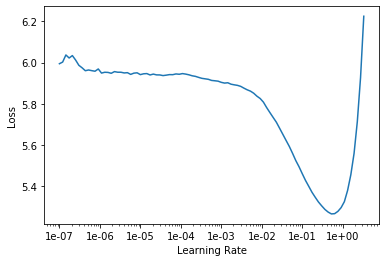

In [162]:
learn.lr_find()
learn.recorder.plot(skip_start=0)

In [163]:
learn.fit_one_cycle(1, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,4.656288,3.901243,0.327595,00:05


In [164]:
learn.save('head_pretrained')

In [165]:
learn.unfreeze()
learn.fit_one_cycle(10, 1e-3, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,3.831408,3.671864,0.350014,00:07
1,3.538953,3.357298,0.395061,00:07


KeyboardInterrupt: 

In [167]:
learn.save('lm_fine_tuned_2epoch')

In [166]:
learn.save_encoder('ft_enc_2epoch')

In [168]:
tokenizer = Tokenizer(lang='fr', n_cpus=24)


In [171]:
data_clas = TextClasDataBunch.from_csv(mdl_path, vocab=data_lm.train_ds.vocab, bs=bs, csv_name='newtrain.csv', tokenizer=tokenizer)

/home/momgpu/.local/lib/python3.7/site-packages/fastai/data_block.py:534: UserWarning: You are labelling your items with CategoryList.
Your valid set contained the following unknown labels, the corresponding items have been discarded.
3319, 9189, 3439, 9490, 8668...
  if getattr(ds, 'warn', False): warn(ds.warn)


In [172]:
data_clas.split_from_df(col=1)

/home/momgpu/.local/lib/python3.7/site-packages/fastai/data_block.py:451: UserWarning: Your training set is empty. If this is by design, pass `ignore_empty=True` to remove this warning.
  warn("Your training set is empty. If this is by design, pass `ignore_empty=True` to remove this warning.")


ItemLists;

Train: TextList (0 items)

Path: /home/momgpu/.fastai/data/frwiki/models;

Valid: TextList (8957 items)
xxbos xxmaj rizzoli , habitué des sommets ( xxup l' xxup équipe ) # xxmaj euro2016 # xxup fra # xxup irl,xxbos xxmaj vous ne regardez pas xxmaj the xxmaj voice ( moi non . xxmaj mais je connais xxmaj sébastien . ) . xxmaj anbe xxmaj sila était en finale . xxmaj concert gratuit right now ...,xxbos xxmaj forum xxmaj or • xxmaj re : xxmaj israël / xxmaj palestine http : / / bit.ly / 1zea1xc,xxbos @cristinacordula xxup c' est quand les xxmaj rois du shopping en xxmaj belgique ? xxmaj ça fait 2 semaines que j' attend ! ! xxup @rtltvi @reinesdushopping,xxbos xxmaj labrune et xxmaj anigo visés par des tags insultants http : / / bit.ly / 1pz7rbn # teamom # xxmaj ligue1 # xxup om
Path: /home/momgpu/.fastai/data/frwiki/models;

Test: None

In [173]:
learn = text_classifier_learner(data_clas, AWD_LSTM, drop_mult=0.3)
learn.load_encoder('ft_enc')
learn.freeze()

RuntimeError: Error(s) in loading state_dict for AWD_LSTM:
	size mismatch for encoder.weight: copying a param with shape torch.Size([12616, 400]) from checkpoint, the shape in current model is torch.Size([12552, 400]).
	size mismatch for encoder_dp.emb.weight: copying a param with shape torch.Size([12616, 400]) from checkpoint, the shape in current model is torch.Size([12552, 400]).

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


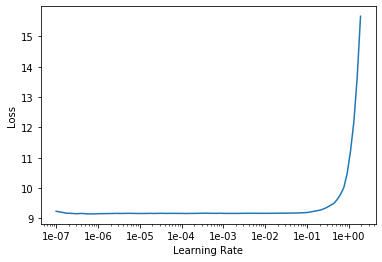

In [174]:
learn.lr_find()
learn.recorder.plot(skip_start=0)

In [175]:
learn.fit_one_cycle(2, 1e-2, moms=(0.8,0.7))

In [26]:
learn.freeze_to(-2)
learn.fit_one_cycle(1, slice(1e-2/(2.6**4),1e-2), moms=(0.8,0.7))

In [ ]:
learn.freeze_to(-3)
learn.fit_one_cycle(1, slice(5e-3/(2.6**4),5e-3), moms=(0.8,0.7))

In [ ]:
learn.unfreeze()
learn.fit_one_cycle(2, slice(1e-3/(2.6**4),1e-3), moms=(0.8,0.7))

In [ ]:
learn.fit_one_cycle(2, slice(1e-3/(2.6**4),1e-3), moms=(0.8,0.7))

In [ ]:
#learn.save('class-0.9349')